In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

In [3]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') # 1차원배열로 reshape
X_test = X_test.reshape(X_test.shape[0],-1).astype('float32')# 1차원배열로 reshape

Y_train =tf.keras.utils.to_categorical(Y_train) # 정수 ----> one-hot
Y_test = tf.keras.utils.to_categorical(Y_test) # 정수 ----> one-hot

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [14]:
#모델 설계
# method 1
input_Layer = tf.keras.layers.Input(shape=(784,)) # 데이터 입력
x = tf.keras.layers.Dense(512, activation='relu')(input_Layer) # hidden layer 1
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 1
Out_Layer=tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# 모델 컴파일
loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss,
             optimizer=optimizer,
             metrics=['accuracy'])

In [16]:
# 베스트 모델 저장을 위한 디렉토리 선언
MODEL_DIR = './MNIST_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

## 저장한 모델의 주소와 이름.
modelpath="./MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [19]:
## 사용할 callback 함수 선언.
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose =1, save_best_only=True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)]

# 모델의 실행
#  validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1, callbacks=callback_list)

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
48/48 [==============================] - ETA: 0s - loss: 7.1331e-05 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.42069, saving model to ./MNIST_model/01-0.4207.hdf5
48/48 [==============================] - 5s 115ms/step - loss: 7.1331e-05 - accuracy: 1.0000 - val_loss: 0.4207 - val_accuracy: 0.9585
Epoch 2/30
48/48 [==============================] - ETA: 0s - loss: 6.8378e-05 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.42069
313/313 [==============================] - 1s 4ms/step - loss: 0.4550 - accuracy: 0.9567

 Test Accuracy: 0.9567


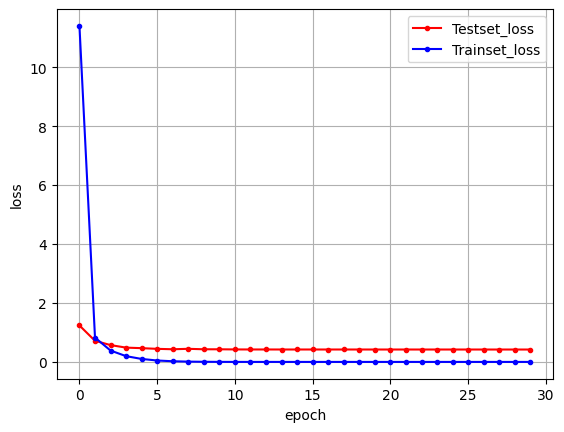

In [18]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()